<a href="https://colab.research.google.com/github/seungbinahn/START_AI/blob/master/03_CNN/01_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
* 이미지 처리에 적합한 딥러닝 기술
* DNN에 Convolution 기능을 추가하여 영상을 처리함



## DNN과 영상처리
* 딥러닝에서 영상을 처리하려면 Flatten을 통해 1차원으로 영상을 1차원을 변환
* 이에 따라 영상의 특성이 사라짐
* 이로인해 훈련 데이터에서만 잘 동작하게 되는 overfiting 발생


## CNN
* 반면 CNN은 수직선, 대각선, 수평선의 성질을 컨볼루션을 통해 특성을 식별
* 이는 필터(커널)을 사용하여 특성을 탐색함
* 활성함수는 RELU 사용
* RELU = wx+b 

## CNN 과정
1. Conv2D : 특성 추출
2. Max pooling : 압축
3. 1~2 n번 수행
4. Flatten
5. DNN

## Zero padding
* 필터링 연산을 수행하면 행렬의 크기가 작아짐
* 이를 방지하기 위해 주변에 0으로 패딩을 채워놓고 연산을 수행하여 행렬의 크기를 유지함

## Pooling
* Feature Map에서 차원을 축소
* 고해상도 이미지를 저해상도로 바꾸는 작업과 유사
* Max, Average Pooling이 일반적으로 사용 됨


# MNIST 데이터셋 분류

## 1. GPU 설정 확인

In [ ]:
!nvidia-smi

Mon Aug  3 07:32:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    59W / 149W |   1157MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        75G   33G   43G  44% /opt/bin
tmpfs           6.4G   16K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/meminfo

MemTotal:       13333556 kB
MemFree:         8928944 kB
MemAvailable:   11874200 kB
Buffers:           79696 kB
Cached:          2685228 kB
SwapCached:            0 kB
Active:          1281284 kB
Inactive:        2760972 kB
Active(anon):     919248 kB
Inactive(anon):     2388 kB
Active(file):     362036 kB
Inactive(file):  2758584 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:                84 kB
Writeback:             0 kB
AnonPages:       1277348 kB
Mapped:           589360 kB
Shmem:              3012 kB
Slab:             176556 kB
SReclaimable:     131056 kB
SUnreclaim:        45500 kB
KernelStack:        3876 kB
PageTables:         9320 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3549896 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              944 kB
AnonHugePages:   

## 2. MNIST 데이터 다운로드

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [ ]:
train_labels[0] # 첫번째 트레인 데이터의 레이블

5

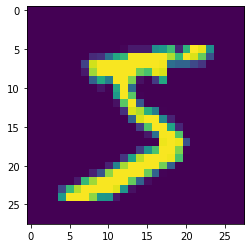

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images[0,7,10] # 숫자 부분

253

## 3. 이미지 데이터 전처리
* 딥러닝 모델에서 학습하기 쉬운 형태로 입력데이터 전처리(정규화, 필터 차원 일치)
* 이미지 데이터이므로 차원 추가
* 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어짐
* 흑백 이미지는 하나의 컬러 채널만 가지고 있어 2D 텐서로 저장 가능
* 하지만 관례상 이미지 텐서는 항상 3D로 저장


* 정규화 : 값을 0과 1 사이로 스케일을 조정
* 정규화 하지 않은 데이터의 값이 지나치게 크기가 크다면, 이는 편향 된 결과를 야기할 수 있음
* 흑백 이미지 : 2D->3D 바꾸고, 값 정규화

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255 # float로 바꾸고 255로 나누면 0~1사이로 표준화됨

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255 # float로 바꾸고 255로 나누면 0~1사이로 표준화됨

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
# 값 확인
train_images[0,7,10,0]

0.99215686

## 4. label one-hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_labels.shape)
print(train_labels)
print(train_labels[0])

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 5. 모델 만들기

### Conv2D
* padding : 패딩 (default는 사용안함)
* kernel : 커널 크기
* stride : 간격
* filter : 사용할 필터 갯수
* activation : 활성화 함수(relu)

### MaxPooling

* kernel : 커널 크기
* stride : 간격

In [ ]:
from tensorflow.keras import models, layers

* 컨볼루션 레이어

In [ ]:
# Sequential 모델 객체 생성
model = models.Sequential()

# 첫번째 층
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1))) # (26,26,32)
model.add(layers.MaxPool2D(pool_size=(2,2))) #(13,13,32)

# 두번째 층
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')) # (11,11,64)
model.add(layers.MaxPool2D(pool_size=(2,2))) # (5,5,64)

# 세번째 층
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')) # (3,3,64)

* 분류 레이어

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

* param : 학습 파라미터 : w와 b 값을 나타냄
* Param이 몇개있는가

* Conv2D : 필터갯수 * 입력 크기 * 커널넓이 + 필터갯수
  



In [ ]:
# Conv 1
32 * (3 * 3) + 32 

320

In [ ]:
# Conv 2 
64 * (32 * 3 * 3) + 64

18496

In [ ]:
# Conv3
64 * (64 * 3 * 3) + 64

36928

In [ ]:
# Dense 1
64 * 576 + 64

36928

In [ ]:
# Dense 2
10 * 64 + 10

650

## 6. 컴파일
* loss(손실함수) : 훈련 데이터에서 신경망의 성능을 측정하는 방법
* optimizer : 입력된 데이터와 손실함수를 기반으로 네트워크를 업데이트 하는 매커니즘
* metrics : 훈련과 테스트 과정을 모니터링할 지표

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 7. 훈련
* x : 입력 데이터
* y : 라벨 값
* batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지 지정
* epochs : 학습 반복 횟수
* 1 epochs = batch_size * step 수
* validation_split: 0과 1 사이의 부동소수점 값, 유효성 검사 데이터로 사용할 훈련 데이터의 비율

* 60000 * 0.8 = 48000


In [ ]:
history = model.fit(x=train_images, y=train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 8s 10ms/step - loss: 0.1971 - accuracy: 0.9378 - val_loss: 0.0946 - val_accuracy: 0.9693
Epoch 2/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.0433 - val_accuracy: 0.9873
Epoch 3/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0371 - accuracy: 0.9892 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 4/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 5/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0387 - val_accuracy: 0.9896
Epoch 6/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.0402 - val_accuracy: 0.9907
Epoch 7/30
750/750 [==============================] - 7s 10ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0515 - val_accuracy: 0.9893

## 8. 모델 평가하기

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0978 - accuracy: 0.9907


* DNN은 97.8 %
* DNN에 비하여 더 좋은 성능을 보여줌

## 9. 성능 시각화

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

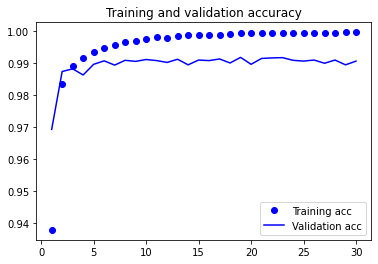

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

* validation acc는 더이상 증가하지 않음 -> overfiting

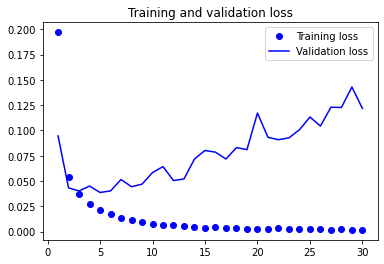

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

10. 모델 사용하기

In [ ]:
import numpy as np
print(test_images[0].shape)
predict = model.predict(test_images[8].reshape(1,28,28,1))
print(np.argmax(test_labels[8]))
print(np.argmax(predict))

(28, 28, 1)
5
5


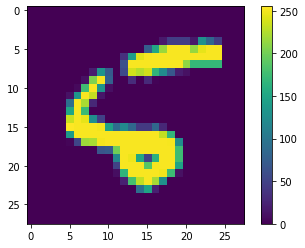

In [ ]:
plt.figure()
plt.imshow(test_images[8].reshape(28,28)*255)
plt.colorbar()
plt.grid(False)
plt.show()